<a href="https://colab.research.google.com/github/pratu96/ass/blob/main/OIBSIP_Level_1_Task_2_Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import pandas as pd

**Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import the Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ifood_df.csv')

In [ ]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [ ]:
df.shape

(2205, 39)

In [ ]:
df.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Income,1.000000,-0.531699,0.042483,0.006716,0.730495,0.537920,0.702500,0.551758,0.555601,0.417653,...,-0.001960,0.044336,-0.060621,-0.239604,0.017644,0.021633,0.091176,0.823066,0.816879,0.388247
Kidhome,-0.531699,1.000000,-0.040207,0.011829,-0.499288,-0.374388,-0.445665,-0.389895,-0.379101,-0.356550,...,0.007422,-0.072244,0.019050,0.055308,-0.001930,0.011482,-0.042031,-0.551152,-0.539828,-0.212080
Teenhome,0.042483,-0.040207,1.000000,0.013881,0.002783,-0.176925,-0.267177,-0.206371,-0.164246,-0.019619,...,0.027181,0.047962,-0.056259,-0.120519,-0.024698,0.023806,0.092901,-0.142995,-0.146866,-0.130255
Recency,0.006716,0.011829,0.013881,1.000000,0.016470,-0.004909,0.026138,0.001177,0.025535,0.018558,...,0.023908,-0.001348,-0.006789,-0.003093,0.031419,-0.025563,-0.009234,0.021132,0.020241,-0.013344
MntWines,0.730495,-0.499288,0.002783,0.016470,1.000000,0.384947,0.593119,0.395967,0.388613,0.390194,...,0.005915,0.034139,-0.096259,-0.140369,-0.060920,0.036403,0.160804,0.902310,0.901848,0.509913
MntFruits,0.537920,-0.374388,-0.176925,-0.004909,0.384947,1.000000,0.568100,0.592556,0.570986,0.392596,...,-0.014210,0.025961,0.025452,-0.060915,0.114919,-0.055581,-0.084301,0.606658,0.594180,0.155133
MntMeatProducts,0.702500,-0.445665,-0.267177,0.026138,0.593119,0.568100,1.000000,0.595673,0.556511,0.375581,...,-0.004064,0.017370,-0.041738,-0.111968,0.064917,-0.004020,-0.004194,0.861392,0.860663,0.319553
MntFishProducts,0.551758,-0.389895,-0.206371,0.001177,0.395967,0.592556,0.595673,1.000000,0.582974,0.425420,...,0.015502,0.041886,0.061304,-0.059840,0.106227,-0.050153,-0.103952,0.635038,0.620626,0.174675
MntSweetProducts,0.555601,-0.379101,-0.164246,0.025535,0.388613,0.570986,0.556511,0.582974,1.000000,0.355747,...,-0.011220,0.049347,0.060550,-0.057863,0.104075,-0.067723,-0.085702,0.604514,0.595394,0.200174
MntGoldProds,0.417653,-0.356550,-0.019619,0.018558,0.390194,0.392596,0.375581,0.425420,0.355747,1.000000,...,-0.010375,0.043096,0.019189,-0.065014,0.131759,-0.032492,-0.119708,0.463694,0.388776,0.194647


In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

**Checking the data that there is any missing column is present or not**

In [ ]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


**Assigning unique value**

In [ ]:
df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


**Dropping the ZCost and ZRevenue columns because both the columns are having the same values**

In [ ]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

**Let's visualize the data with box plots, histogram, pie Charts, Scatter Plots, Correlation Matrix and Binary Values Correlations.**

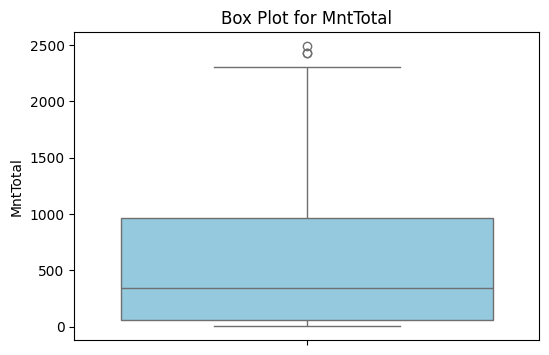

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='MntTotal', color='skyblue')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

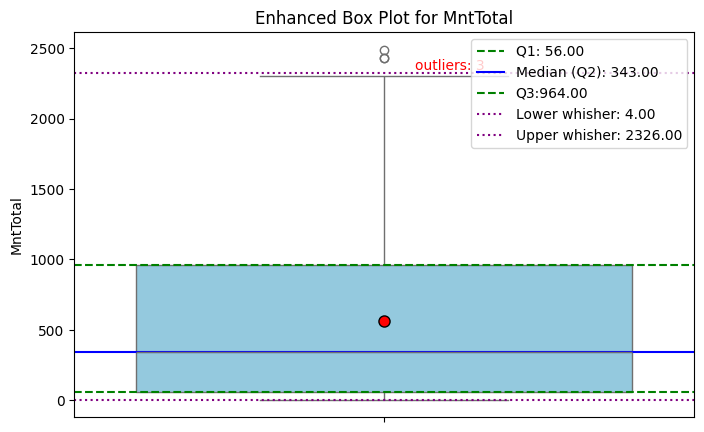

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#compute key box plot statistics
Q1 = df['MntTotal'].quantile(0.25)
Q2 = df['MntTotal'].median()
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_whisher = max(df['MntTotal'].min(), Q1 - 1.5 * IQR)
upper_whisher = min(df['MntTotal'].max(), Q3 + 1.5 * IQR)
outliers = df[(df['MntTotal']< lower_whisher) | (df['MntTotal']> upper_whisher)]['MntTotal']

#create figure
plt.figure(figsize=(8, 5))

#Boz plot
sns.boxplot(data=df, y='MntTotal', color='skyblue', showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'black', 'markersize':'8'})

# add text annotations for key statistics
plt.axhline(Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axhline(Q2, color='blue', linestyle='-', label=f'Median (Q2): {Q2:.2f}')
plt.axhline(Q3, color='green', linestyle='--', label=f'Q3:{Q3:.2f}')
plt.axhline(lower_whisher, color= 'purple', linestyle=':', label=f'Lower whisher: {lower_whisher:.2f}')
plt.axhline(upper_whisher, color= 'purple', linestyle=':', label=f'Upper whisher: {upper_whisher:.2f}')

#Display outlier count
plt.text(0.05, upper_whisher, f'outliers: {len(outliers)}', fontsize=10, color= 'red', verticalalignment='bottom')

#label & title
plt.title('Enhanced Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.legend(loc='upper right')

#show plot
plt.show()

**Understanding Outliers in a Box Plot**

In [ ]:
Q1= df['MntTotal'].quantile(0.25)
Q3= df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


**Removing the Outliers**

In [ ]:
data = df[(df['MntTotal'] >= lower_bound) & (df['MntTotal'] <= upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


**Histogram and bocplot for income**

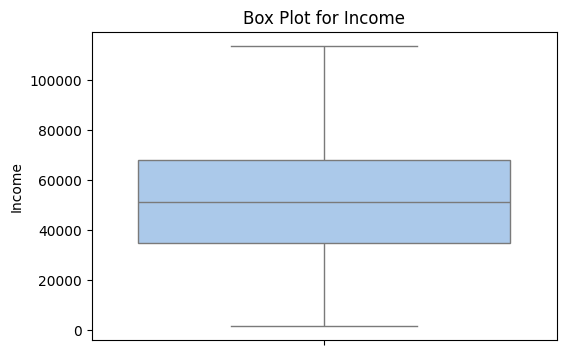

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='Income', palette='pastel')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

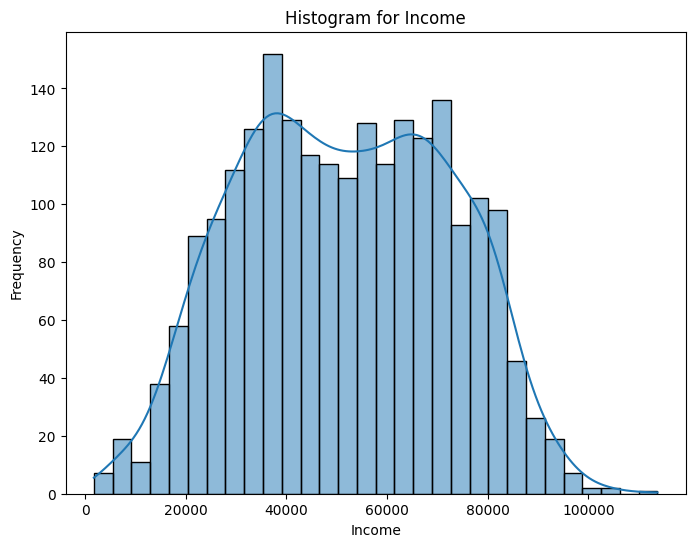

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='Income', kde=True, bins=30, palette='virdis')
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

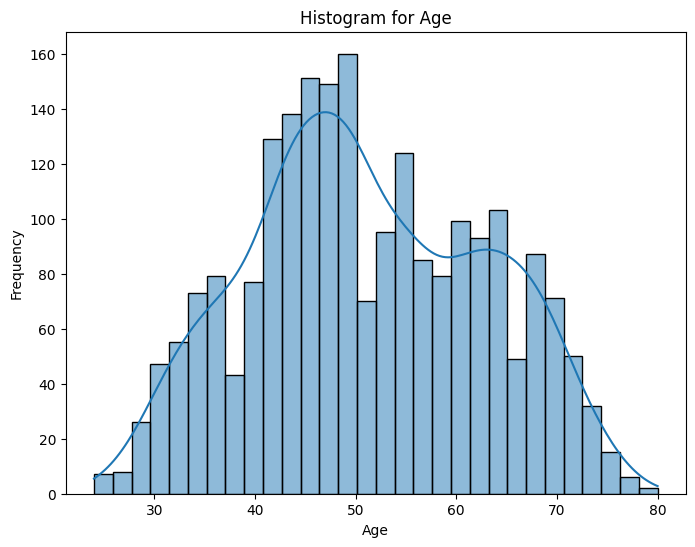

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='Age', kde=True, bins=30)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Skewness and Kurtosis**

In [ ]:
print('Skewness: %f' %data['Age'].skew())
print('Kurtosis:%f' %data['Age'].kurt())

Skewness: 0.091227
Kurtosis:-0.796125


**Correlation Matrix**

In [ ]:
cols_demographics = ['Age', 'Income']
cols_childern = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single','marital_Together','marital_Widow']
cols_mnt = ['MntTotal','MntRegularProds','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
cols_communication = ['Complain','Response','Customer_Days']
cols_campaigns =['AcceptedCmpOverall','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumWebVisitsMonth']
cols_education = ['education_2n Cycle','education_Basic','education_Master','education_PhD']

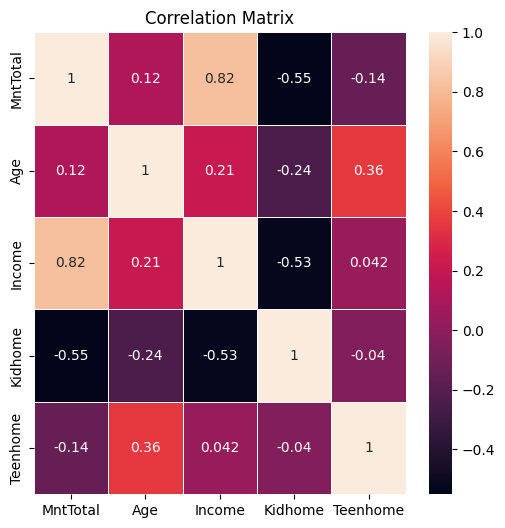

In [ ]:
corr_matrix = df[['MntTotal']+cols_demographics+cols_childern].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Point-Biserial correlation for binary variables**

In [ ]:
for col in cols_marital:
  correlation, p_value = pointbiserialr(df[col],df['MntTotal'])
  print(f'{correlation:.4f}: point-Biserial Correlation for {col} with p-value {p_value:.4f}')

0.0037: point-Biserial Correlation for marital_Divorced with p-value 0.8612
-0.0223: point-Biserial Correlation for marital_Married with p-value 0.2963
0.0059: point-Biserial Correlation for marital_Single with p-value 0.7804
0.0016: point-Biserial Correlation for marital_Together with p-value 0.9393
0.0359: point-Biserial Correlation for marital_Widow with p-value 0.0921


In [ ]:
for col in cols_education:
  correlation, p_value = pointbiserialr(df[col],df['MntTotal'])
  print(f'{correlation:.4f}: point-Biserial Correlation for {col} with p-value {p_value:.4f}')

-0.0603: point-Biserial Correlation for education_2n Cycle with p-value 0.0046
-0.1386: point-Biserial Correlation for education_Basic with p-value 0.0000
0.0064: point-Biserial Correlation for education_Master with p-value 0.7653
0.0708: point-Biserial Correlation for education_PhD with p-value 0.0009


**Future Enggineering**

In [ ]:
def get_marital_status(row):
  if row['marital_Divorced'] == 1:
    return 'Divorced'
  elif row['marital_Married'] == 1:
    return 'Married'
  elif row['marital_Single'] == 1:
    return 'Single'
  elif row['marital_Together'] == 1:
    return 'Together'
  elif row['marital_Widow'] == 1:
    return 'Widow'
  else:
    return 'Unknown'

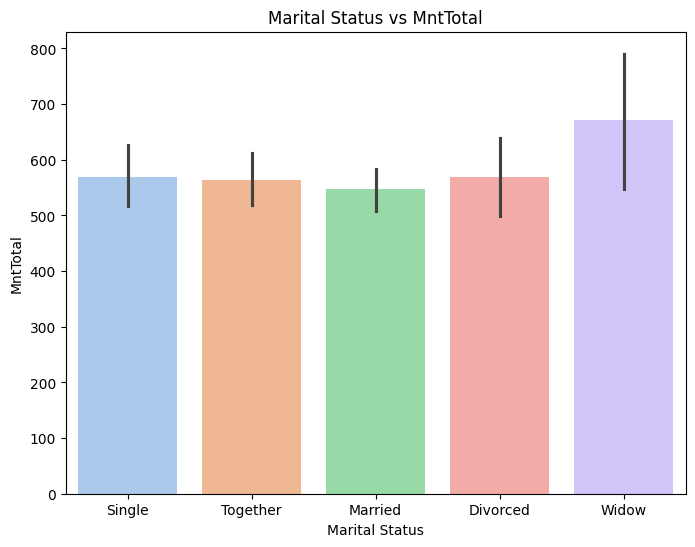

In [ ]:
df['Marital'] = df.apply(get_marital_status, axis=1)
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=df, palette='pastel')
plt.title('Marital Status vs MntTotal')
plt.xlabel('Marital Status')
plt.ylabel('MntTotal')
plt.show()

**New Feature and Relationship**

In [ ]:
def get_relationship(row):
  if row['marital_Married']==1:
    return 1
  elif row['marital_Together']==1:
    return 1
  else:
    return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


**Machine Learning:K-Means Clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income','MntTotal','In_relationship']
df_scaled = df.copy()
df_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])
df_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,2.255691e-17,-3.705778e-17,6.444832e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.704038e-01,-1.347625e+00
25%,-7.932106e-01,-8.800957e-01,-1.347625e+00
50%,-1.618161e-02,-3.816642e-01,7.420464e-01
75%,8.044529e-01,6.968235e-01,7.420464e-01
max,2.999363e+00,3.348757e+00,7.420464e-01


**Principle Component Analysis**

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca_res= pca.fit_transform(df_scaled[cols_for_clustering])
df_scaled['pca1']= pca_res[:,0]
df_scaled['pca2']= pca_res[:,1]


**Elbow method**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = df_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(x).inertia_
    inertia_list.append(inertia)

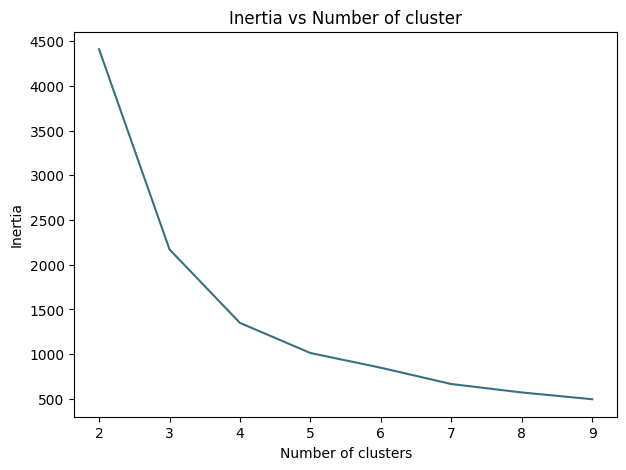

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(range(2, 10), inertia_list, color={54 / 255, 113 / 255, 130 / 255})
plt.title('Inertia vs Number of cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Silhouette score analysis**

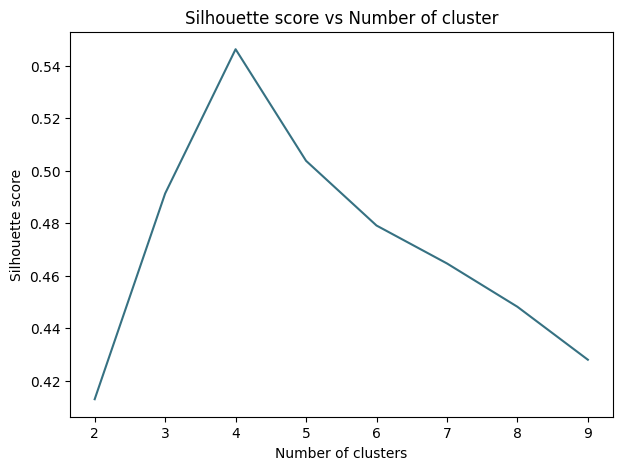

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
  model = KMeans(n_clusters=K, random_state=7)
  clusters = model.fit_predict(x)
  s_avg = silhouette_score(x, clusters)
  silhouette_list.append(s_avg)

plt.figure(figsize=(7,5))
plt.plot(range(2, 10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title('Silhouette score vs Number of cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
model = KMeans(n_clusters=4, random_state=7)
model.fit(df_scaled[cols_for_clustering])
df_scaled['cluster'] = model.predict(df_scaled[cols_for_clustering])

**Exploration of Clusters**

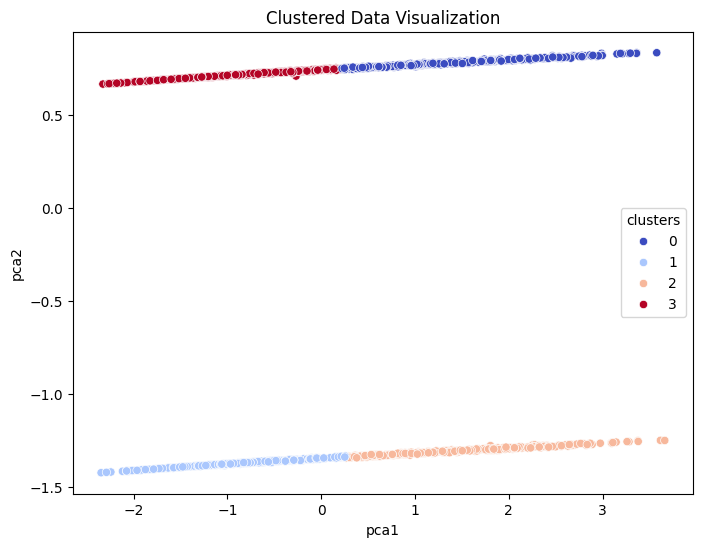

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', data=df_scaled, hue='cluster', palette='coolwarm')
plt.title('Clustered Data Visualization')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend(title='clusters')

In [ ]:
df['cluster'] = df_scaled.cluster
df.groupby('cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
cluster,,,
0,71846.901235,1149.742504,1.0
1,37332.339956,150.761589,0.0
2,72059.439394,1167.306061,0.0
3,37892.819883,158.463158,1.0


In [ ]:
mnt_df = df.groupby('cluster')[cols_mnt].mean().reset_index()
mnt_df.head()

,cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,1149.742504,1078.716049,624.382716,52.700176,342.162257,75.615520,54.881834,71.026455
1,1,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
2,2,1167.306061,1092.893939,617.148485,55.324242,361.278788,77.703030,55.851515,74.412121
3,3,158.463158,133.962573,92.046784,7.640936,39.438596,11.423392,7.913450,24.500585


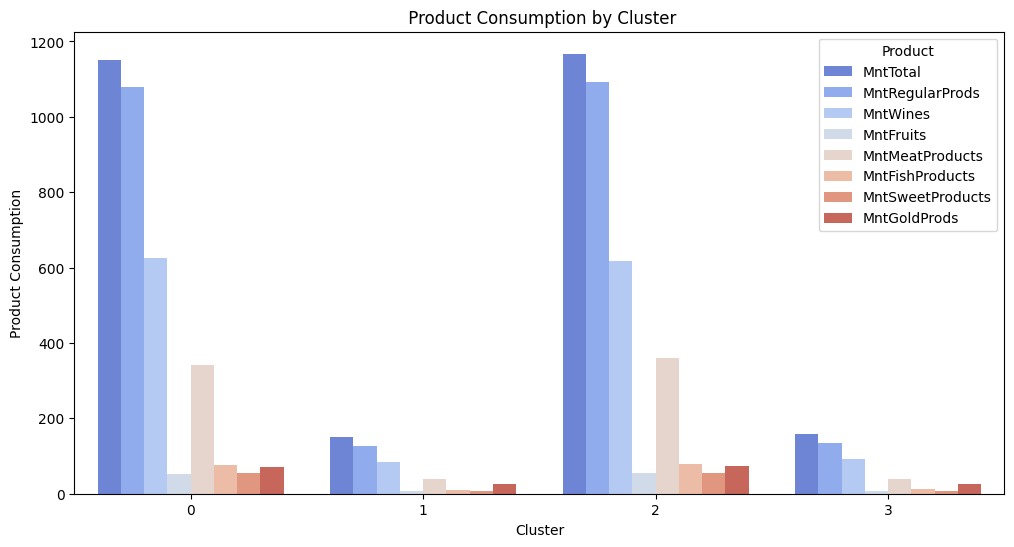

In [ ]:
melted_df = pd.melt(mnt_df, id_vars='cluster', value_name='Consumption',var_name='Product')
plt.figure(figsize=(12,6 ))
sns.barplot(x='cluster',y='Consumption', hue='Product', data= melted_df, ci=None, palette='coolwarm')
plt.title(' Product Consumption by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Product Consumption')
plt.xticks(rotation=0)
plt.legend(title='Product', loc='upper right')
plt.show()

**Cluster Sizes**

Text(0, 0.5, 'MntTotal')

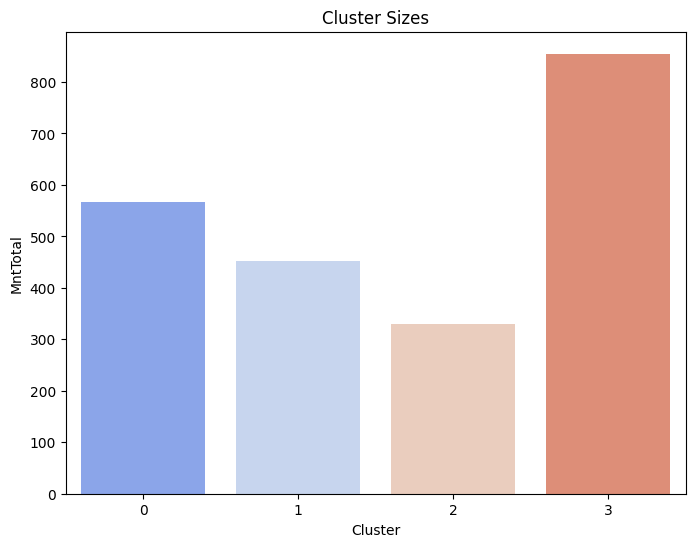

In [ ]:
cluster_sizes = df.groupby('cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='cluster', y='MntTotal', data=cluster_sizes, palette='coolwarm')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')


In [ ]:
total_rows = len(df)
cluster_sizes['share%'] = round(cluster_sizes['MntTotal'] / total_rows * 100, 0)
cluster_sizes.head()

,cluster,MntTotal,share%
0,0,567,26.0
1,1,453,21.0
2,2,330,15.0
3,3,855,39.0


**Income of Cluster**

**Box Plot**

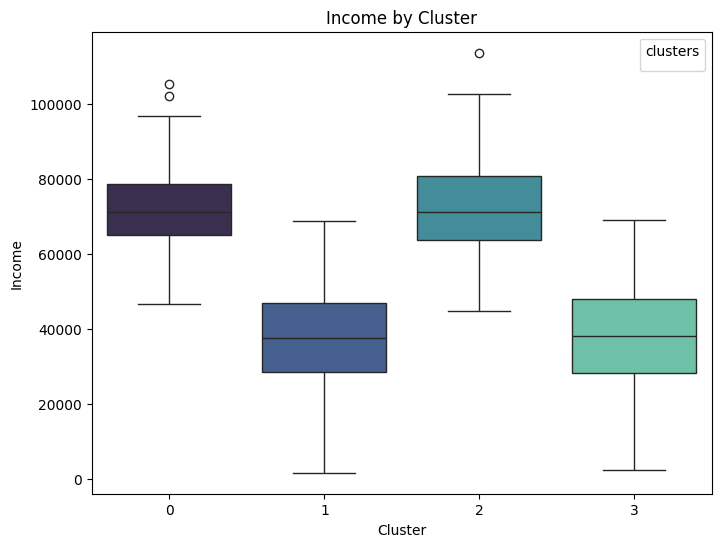

In [ ]:
plt.figure(figsize =(8, 6))
sns.boxplot(x='cluster', y='Income', data=df, palette='mako')
plt.title('Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='clusters')

**Scatter Plot of Income**

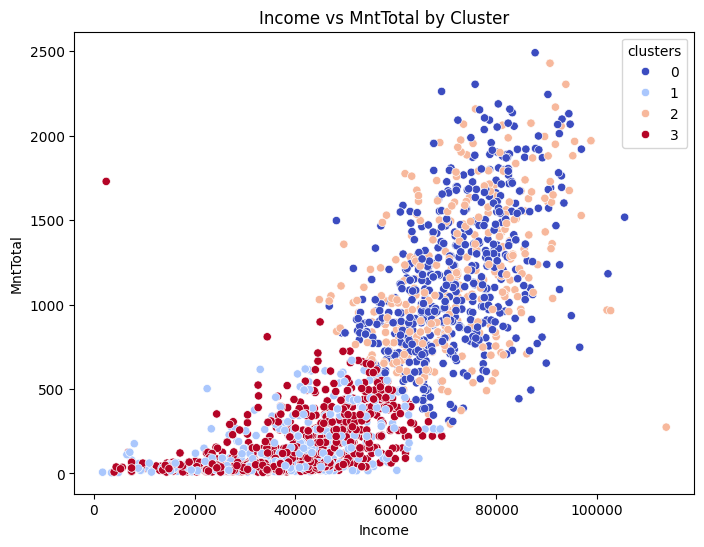

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=df, hue='cluster', palette='coolwarm')
plt.title('Income vs MntTotal by Cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='clusters')

**Create a Machine Learning Model for DBSCAN(Density-Based Spatial Clustering Of Application with noise)**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, accuracy_score

In [ ]:
#selecting relevent features for clustering
features = ['Income','Kidhome','Teenhome','MntTotal','MntWines','MntFruits','Recency','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntRegularProds','AcceptedCmpOverall']

In [ ]:
#Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])


In [ ]:
#Finding optimal epsilon using k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:,4], axis=0)

**Plotting the Optimal Epsilon using k-distance graph**

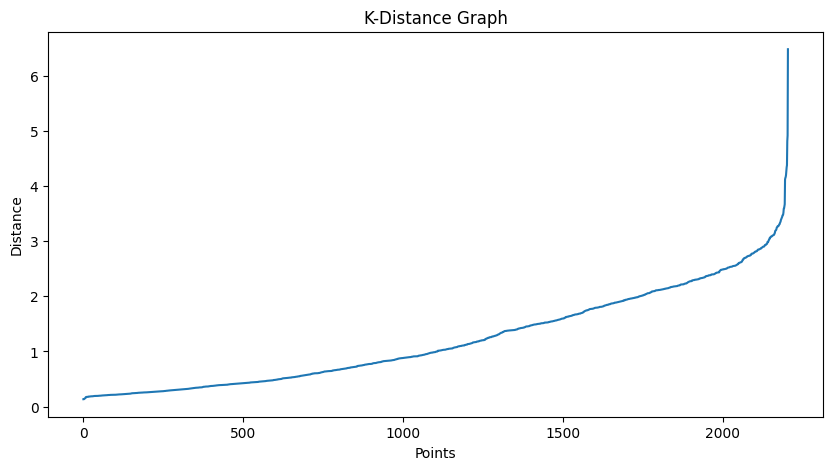

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('K-Distance Graph')
plt.show()

**Applay the DBSCAN for choosing the Parameters**

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(df_scaled)

**Silhouette Score**

In [ ]:
#Evaluating cluster using Silhouette Score (ignoring noise points)
# Create a boolean mask for non-noise points
non_noise_mask = df['Cluster'] != -1

# Get the data points and their corresponding cluster labels for non-noise points
X_filtered = df_scaled[non_noise_mask]
labels_filtered = df.loc[non_noise_mask, 'Cluster']

# Check if there are at least two distinct clusters (excluding noise) to compute silhouette score
# This handles cases where only noise points or only one cluster is found after filtering
import numpy as np
if len(np.unique(labels_filtered)) > 1:
  silhouette_avg = silhouette_score(X_filtered, labels_filtered)
  print(f'Silhouette Score: {silhouette_avg:.4f}')
else:
  print('Cannot compute Silhouette Score: Not enough distinct clusters (excluding noise).')

Silhouette Score: 0.1609


**Types of Errors for model performance**

**Mean Squared Error (MSE)**

In [ ]:
#Calculating mean squared error for model performance
def calculate_mse(df, features):
  mse_values = []
  for cluster in set(df['Cluster']):
    if cluster != -1:
      cluster_data = df_scaled[df['Cluster'] == cluster]
      cluster_center = cluster_data.mean(axis=0)
      mse = mean_squared_error(cluster_data, np.full(cluster_data.shape, cluster_center))
      mse_values.append(mse)
  return np.mean(mse_values) if mse_values else None

In [ ]:
mse_score = calculate_mse(df, features)
print(f'Mean Squared Error (MSE): {mse_score}')

Mean Squared Error (MSE): 0.13560418994534085


**Real Mean Squared (RMSE)**

In [ ]:
#Calculating Root Mean Squared Error(RMSE) for model performance
def calculate_rmse(df, features):
  rmse_values = []
  for cluster in set(df['Cluster']):
    if cluster != -1:
      cluster_data = df_scaled[df['Cluster'] == cluster]
      cluster_center = cluster_data.mean(axis=0)
      rmse = np.sqrt(mean_squared_error(cluster_data, np.full(cluster_data.shape, cluster_center)))
      rmse_values.append(rmse)
  return np.mean(rmse_values) if rmse_values else None

In [ ]:
rmse_score = calculate_rmse(df, features)
print(f'Root Mean Squared Error (RMSE): {rmse_score}')

Root Mean Squared Error (RMSE): 0.3486401109858002


**K-Distance Plot for DBSCAN**

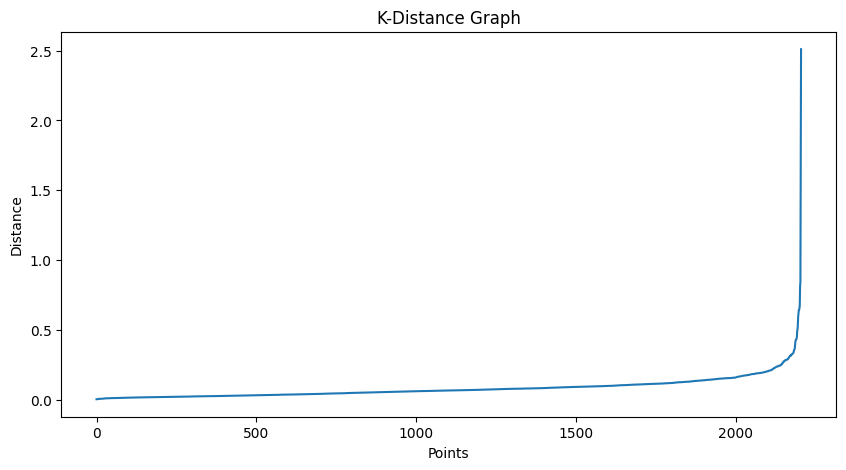

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

#select min_samples (typically 2-4% of data size)
min_samples= 5

#Compute k-nearest neighbor distances
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(x)
distances, indices = neighbors.kneighbors(x)

#sort distances and plot
distance = np.sort(distances[:,min_samples-1], axis=0)
plt.figure(figsize=(10, 5))
plt.plot(distance)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('K-Distance Graph')
plt.show()

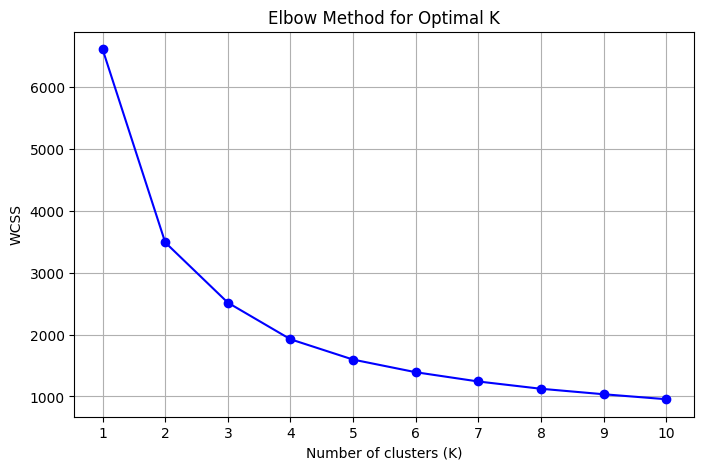

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Selecting relevant features for clustering
features = ['MntTotal','Income','Age']

#Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

#computer wCSS for different K Values
WCSS = []
K_range = range(1, 11)
for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init= 10)
  kmeans.fit(X_scaled)
  WCSS.append(kmeans.inertia_)

#Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, WCSS, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(K_range)
plt.grid(True)
plt.show()

**Tune min_samplee using the log rule**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

#try different Values of min_samples
for min_samples in range(3, 10):
  dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
  labels = dbscan.fit_predict(x)
  score = silhouette_score(x, labels)
  print(f'Silhouette score for min_samples: {min_samples} : {score}')


Silhouette score for min_samples: 3 : 0.3820091337956475
Silhouette score for min_samples: 4 : 0.3820091337956475
Silhouette score for min_samples: 5 : 0.3820091337956475
Silhouette score for min_samples: 6 : 0.3820091337956475
Silhouette score for min_samples: 7 : 0.3820091337956475
Silhouette score for min_samples: 8 : 0.3820091337956475
Silhouette score for min_samples: 9 : 0.3820091337956475


**To check percentage of noise points?**

In [ ]:
import numpy as np

# count noise points (-1 labels)
labels = dbscan.fit_predict(x)
num_noise = np.sum(labels == -1)
total_points = len(labels)

noise_percentage = (num_noise / total_points) * 100
print(f'Percentage of noise points: {noise_percentage:.2f}%')

Percentage of noise points: 0.27%


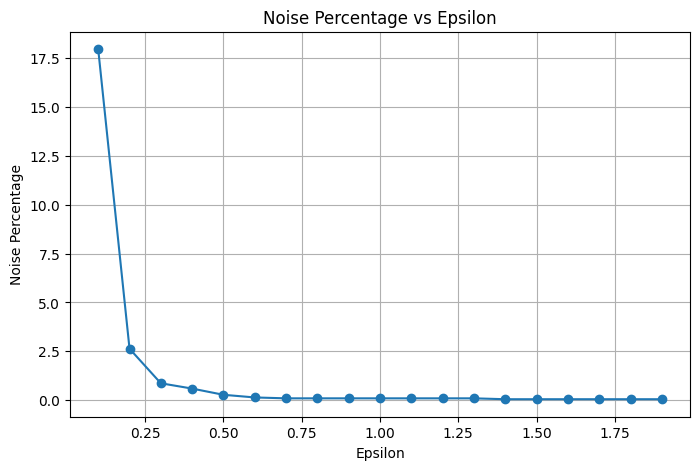

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

eps_values = np.arange(0.1, 2.0, 0.1)
silhouette_scores = []
noise_percentages = [] # Initialize noise_percentages list

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(x)
    num_noise = np.sum(labels == -1)
    noise_percentages.append((num_noise / len(labels)) * 100)

#plot
plt.figure(figsize=(8, 5))
plt.plot(eps_values, noise_percentages, marker='o', linestyle='-')
plt.title('Noise Percentage vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Noise Percentage')
plt.grid(True)
plt.show()

**Compare DBSCAN with K-Means in python**

In [ ]:
from sklearn.cluster import DBSCAN, KMeans

#K-Mean with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmean.fit_predict(x)

#compute silhouette score for k_means
kmeans_score = silhouette_score(x, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_score}')


K-Means Silhouette Score: 0.4913656502870399


**Optimize K Using the Silhouette Method**

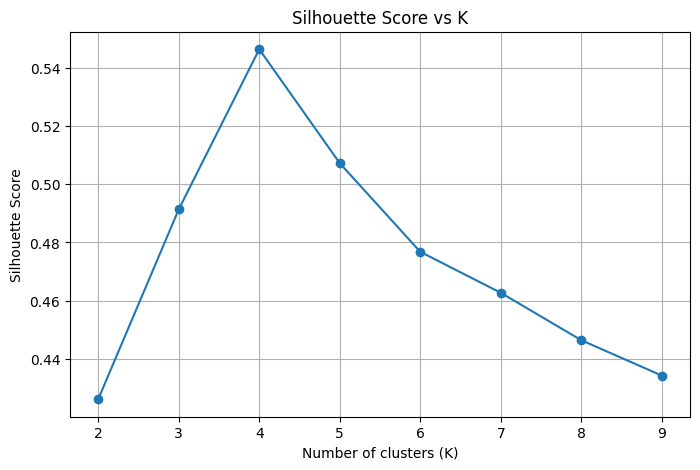

Optimal k based on silhouette score: 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = range(2, 10)
silhouette_scores = []

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(x)
  if len(np.unique(labels)) > 1:
    score = silhouette_score(x, labels)
    silhouette_scores.append(score)
  else:
    silhouette_scores.append(np.nan) # Append NaN if only one cluster is found
    print(f"Warning: KMeans for k={k} resulted in only one cluster. Skipping silhouette score for this k.")

#plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#print the best k
# Filter out NaN values for argmax if any were added
valid_scores = np.array(silhouette_scores)
valid_k_range = np.array(list(k_range))[~np.isnan(valid_scores)]
valid_scores = valid_scores[~np.isnan(valid_scores)]

if len(valid_scores) > 0:
    best_k_index = np.argmax(valid_scores)
    best_k = valid_k_range[best_k_index]
    print(f'Optimal k based on silhouette score: {best_k}')
else:
    print('Could not determine an optimal k based on silhouette score as no valid scores were computed.')

**Standardize the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

**Use PCA to Reduce Dimension**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

new_score = silhouette_score(X_pca, kmeans_labels)
print(f'Silhouette Score with PCA: {new_score}')

Silhouette Score with PCA: 0.4060176703233678
